~~~sql
WITH
ny AS (
SELECT latitude as latNY, longitude as longNY
FROM location
WHERE city=’NYC’
)
aroundNY AS (
SELECT city, latitude, longitude, NumberNegativeNews
FROM ny, event e, location l, date d
WHERE e.locationID=l.locationID and e.dateID=d.dateID and
d.fullDate = ’2017-07-28’ and
RANGE( LOCATION, 150, (latNY, longNY), (latitude, longitude) )
)
SELECT *   // visualização 1
FROM aroundNY
CLUSTER latitude, longitude, NumberNegativeNews
VISUALIZE AS scatter( longitude, latitude, cluster )
SELECT * // visualização 2

FROM  aroundNY
VISUALIZE AS vbar (city, NumberNegativeNews)
~~~

In [ ]:
import math
import pandas as pd


# DataFrames
event = pd.read_csv("./data/event.csv")
location = pd.read_csv("./data/location.csv",index_col="locationID")
date = pd.read_csv("./data/date.csv",index_col="dateID")
content = pd.read_csv("./data/content.csv",index_col="contentID")

# nyc latitude

nyc_location = location[location['city']=="New York"]
nyc_location = nyc_location[['lat','lng']]

# Joining tables (WHERE/JOIN)

event_joined = event.join(date,on="dateID").join(location, on='locationID')

# Around NY
around_ny = event_joined[['city', 'lat', 'lng', 'NumberNegativeNews']]

# Haversine distance between two points on earth. Returns the distance in kilometers
def haversine(lat1, lon1, lat2, lon2, radius=6371):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return radius * c

around_ny['distance'] = around_ny.apply(lambda row: haversine(nyc_location.lat[0], nyc_location.lng[0], row['lat'], row['lng']), axis=1)
around_ny = around_ny[around_ny['distance']<150].drop(columns=['distance'],axis='columns')



/tmp/ipykernel_8290/437433984.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  around_ny['distance'] = around_ny.apply(lambda row: haversine(nyc_location.lat[0], nyc_location.lng[0], row['lat'], row['lng']), axis=1)


,city,lat,lng,NumberNegativeNews
89,North Bellmore,40.6904,-73.5390,1
91,Oak Valley,39.8055,-75.1589,1
106,Muttontown,40.8254,-73.5363,0
141,Wilton Center,41.1880,-73.4298,1
154,Orient,41.1425,-72.2770,0


In [49]:
# Cluster - Kmeans
from sklearn.cluster import KMeans

cluster_data = around_ny[['lat','lng','NumberNegativeNews']]

km = KMeans(n_clusters=3,init='random')
km.fit(cluster_data)
cluster_data['cluster'] = km.labels_

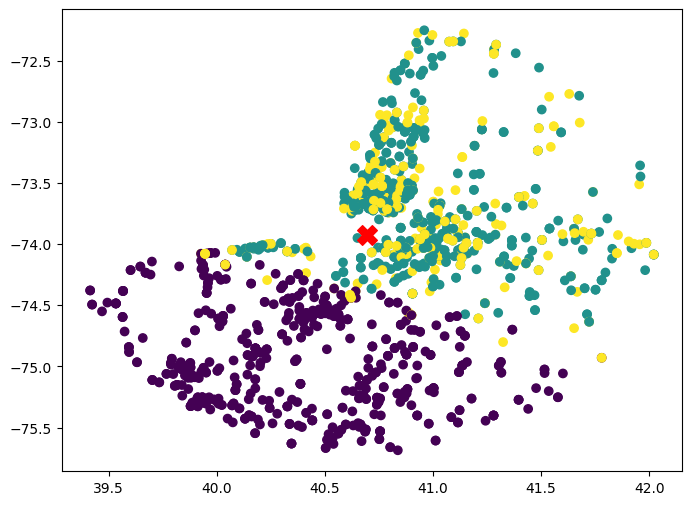

In [50]:
# Visualize as scatterplot (lat,lng, cluster)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(cluster_data['lat'],cluster_data['lng'],c=cluster_data['cluster']
)

# Configurações do gráfico
plt

plt.scatter(
    nyc_location['lat'][0], 
    nyc_location['lng'][0], 
    color='red',       # Cor do ponto central
    s=200,             # Tamanho maior para destaque
    label="Ponto Central",
    marker='X'         # Formato de marcador
)


<module 'matplotlib.pyplot' from '/home/felipe/code/mestrado/eventmining/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

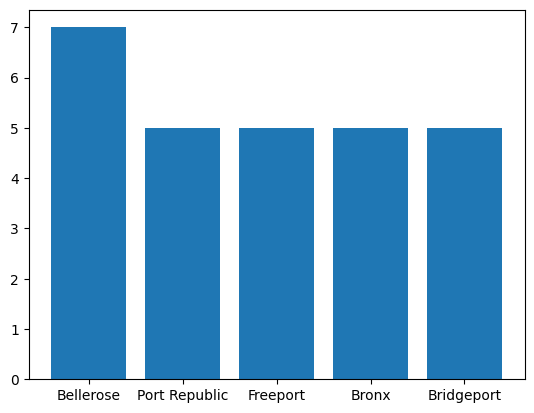

In [59]:
# vBar

bar_visualization = around_ny[['city','NumberNegativeNews']]
bar_visualization = bar_visualization.groupby('city').count().reset_index().sort_values('NumberNegativeNews',ascending=False)[:5]
plt.bar(bar_visualization['city'],bar_visualization['NumberNegativeNews'])
plt

/tmp/ipykernel_8290/1746751288.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  around_ny['distance'] = around_ny.apply(lambda row: haversine(nyc_location.lat[0], nyc_location.lng[0], row['lat'], row['lng']), axis=1)


<module 'matplotlib.pyplot' from '/home/felipe/code/mestrado/eventmining/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

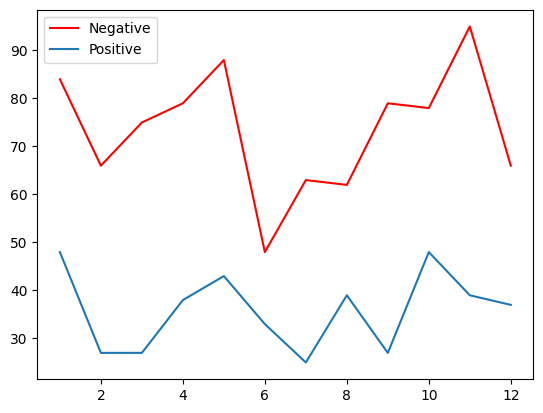

In [68]:
# line plot

import math
import pandas as pd


# DataFrames
event = pd.read_csv("./data/event.csv")
location = pd.read_csv("./data/location.csv",index_col="locationID")
date = pd.read_csv("./data/date.csv",index_col="dateID")
content = pd.read_csv("./data/content.csv",index_col="contentID")

# nyc latitude

nyc_location = location[location['city']=="New York"]
nyc_location = nyc_location[['lat','lng']]

# Joining tables (WHERE/JOIN)

event_joined = event.join(date,on="dateID").join(location, on='locationID')

# Around NY
around_ny = event_joined[['city', 'month','lat', 'lng', 'NumberNegativeNews', 'NumberPositiveNews']]

# Haversine distance between two points on earth. Returns the distance in kilometers
def haversine(lat1, lon1, lat2, lon2, radius=6371):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return radius * c

around_ny['distance'] = around_ny.apply(lambda row: haversine(nyc_location.lat[0], nyc_location.lng[0], row['lat'], row['lng']), axis=1)
around_ny = around_ny[around_ny['distance']<150].drop(columns=['distance'],axis='columns')

month_table = around_ny[['month','NumberNegativeNews','NumberPositiveNews']].groupby('month').sum().reset_index()
plt.plot(month_table['month'],month_table['NumberNegativeNews'],label="Negative",color="red")
plt.plot(month_table['month'],month_table['NumberPositiveNews'],label="Positive")
plt.legend()
plt


In [66]:
month_table

,month,NumberNegativeNews,NumberPositiveNews
0,1,84,48
1,2,66,27
2,3,75,27
3,4,79,38
4,5,88,43
5,6,48,33
6,7,63,25
7,8,62,39
8,9,79,27
9,10,78,48
